In [1]:
import numpy as np
import importlib
import hopfieldNetwork as hn
import matplotlib.pyplot as plt
import matplotlib

In [2]:
importlib.reload(hn)

<module 'hopfieldNetwork' from '/Users/agnieszkamiszkurka/Documents/KTH/S2/ANN/labs/ann_lab1/lab3/hopfieldNetwork.py'>

In [3]:
N2 = 1024
log2N2 = int(np.log2(N2))
pictures_patterns = np.loadtxt('pict.dat', delimiter=',')
pictures_patterns = pictures_patterns.reshape((11, 1024))
pictures_patterns.shape

(11, 1024)

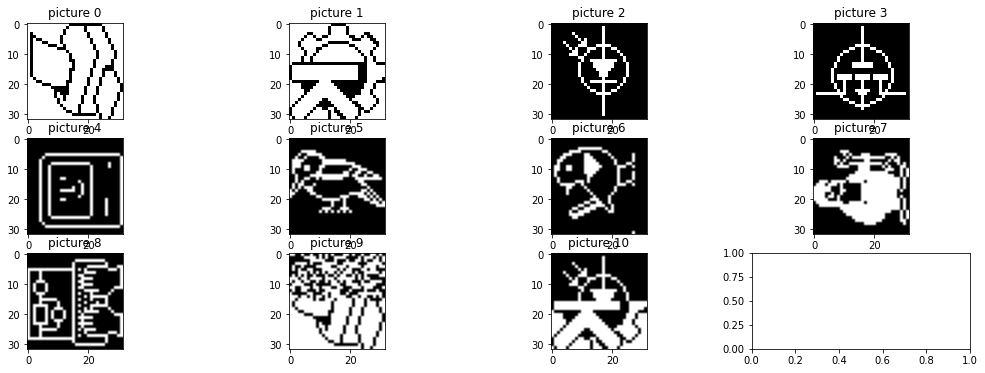

In [4]:
pictures = pictures_patterns.reshape((11, 32, 32))
fig, ax = plt.subplots(3, 4, figsize=(18,6))
for i, pic in enumerate(pictures):
    ax[i//4, i%4].imshow(pic, cmap="binary")
    ax[i//4, i%4].set_title(f"picture {i}")

In [5]:
import sympy 
import numpy as np
for i in range(3,8):
    mat = pictures_patterns[:i,:].T@pictures_patterns[:i,:]  # your matrix
    _, inds = sympy.Matrix(mat).rref()   # to check the rows you need to transpose!
    print('the weight matrix corresponding to the first {} patterns'.format(i)) 
    print('number of independnent columns'.format(len(inds)))
    print('columns = {}'.format(inds))
    print()

ModuleNotFoundError: No module named 'sympy'

### 3.5.1

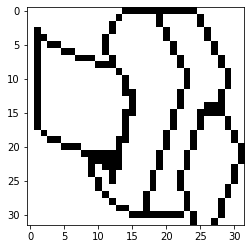

In [4]:
plt.imshow(pictures_patterns[:1,:].reshape((32,32)), cmap="binary")

Fixed Point found after 99 iterations!
This pattern is an attractor!
[-1. -1. -1. ... -1. -1. -1.] 

1


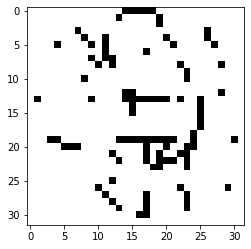

In [5]:
hop_net2 = hn.HopfieldNetwork(np.concatenate((pictures_patterns[7:8,:],pictures_patterns[:3,:]),axis=0))
_, pattern, _ = hop_net2.update_rule(pictures_patterns[0],max_iter=100)
print(hop_net2.check_capacity())
plt.imshow(pattern.reshape((32,32)), cmap="binary")

In [6]:
importlib.reload(hn)
capacity = list()
rng = range(11)
for i in rng:
    hop_net2 = hn.HopfieldNetwork(pictures_patterns[:i,:])
    capacity.append(hop_net2.check_capacity())

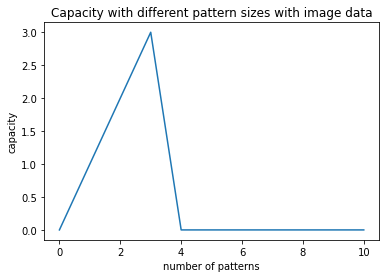

In [7]:
plt.plot(rng,capacity)
plt.xlabel("number of patterns")
plt.ylabel("capacity")
plt.title("Capacity with different pattern sizes with image data")
plt.show()

the drop in performance was aprupt and goes even to zero, which is weird

### 3.5.2

In [8]:
random_patterns = np.random.binomial(1,0.5,(100,1024))*2-1
importlib.reload(hn)
capacity = list()
rng = range(300)
for i in rng:
    hop_net2 = hn.HopfieldNetwork(random_patterns[:i,:])
    capacity.append(hop_net2.check_capacity())

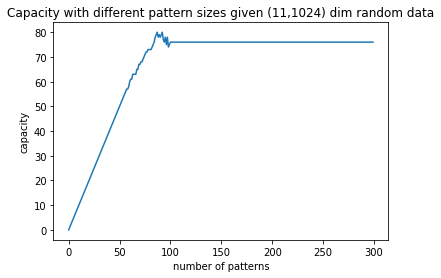

In [9]:
plt.plot(rng,capacity)
plt.xlabel("number of patterns")
plt.ylabel("capacity")
plt.title("Capacity with different pattern sizes given (11,1024) dim random data")
plt.show()

### 3.5.3

The reason that we can store more, is that it is more likely that our random patterns are actually orthotogonal to each other (do the patterns need to be orthotogonal or the features)

### 3.5.4

In [13]:
from utils import add_noise

np.random.seed(3)
random_patterns = np.random.binomial(1,0.5,(300,100))*2-1
importlib.reload(hn)
capacity = list()
noise_cap = list()
rng = range(300)
for i in rng:
    hop_net2 = hn.HopfieldNetwork(random_patterns[:i,:])
    capacity.append(hop_net2.check_capacity())
    noise_capacity = 0
    for j in range(i):
        _, patt, _ = hop_net2.update_rule(add_noise(random_patterns[j], noise_frac=0.05), max_iter=1, verbose=False)
        noise_capacity += np.array_equal(patt, random_patterns[j])
    noise_cap.append(noise_capacity)

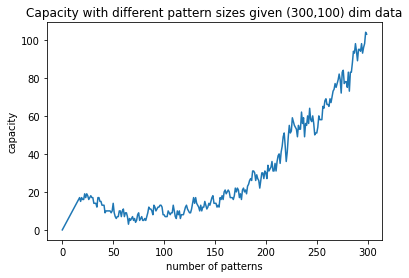

In [14]:
plt.plot(rng,capacity)
plt.xlabel("number of patterns")
plt.ylabel("capacity")
plt.title("Capacity with different pattern sizes given (300,100) dim data")
plt.show()

### 3.5.5

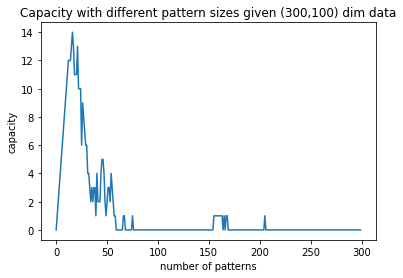

In [15]:
plt.plot(rng,noise_cap)
plt.xlabel("number of patterns")
plt.ylabel("capacity")
plt.title("Capacity with different pattern sizes given (300,100) dim data")
plt.show()

### 3.5.6

In [68]:
random_patterns = np.random.binomial(1,0.5,(300,100))*2-1
importlib.reload(hn)
capacity = list()
rng = range(50)
for i in rng:
    hop_net2 = hn.HopfieldNetwork(random_patterns[:i,:])
    hop_net2.zero_self_connection()
    capacity.append(hop_net2.check_capacity())

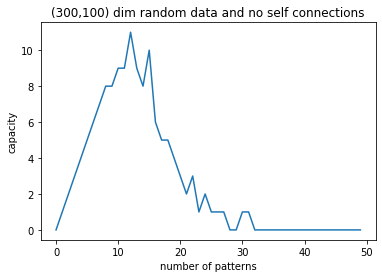

In [69]:
plt.plot(rng,capacity)
plt.xlabel("number of patterns")
plt.ylabel("capacity")
plt.title("(300,100) dim random data and no self connections")
plt.show()

### 3.5.7

In [112]:
p = [0.01,0.05,0.1,0.2,0.3,0.4]
importlib.reload(hn)
max_capacity = list()
rng = range(50)
for j in p:
    random_patterns = np.random.binomial(1,j,(300,100))*2-1
    capacity = list()
    for i in rng:
        hop_net2 = hn.HopfieldNetwork(random_patterns[:i,:])
        hop_net2.zero_self_connection()
        capacity.append(hop_net2.check_capacity())
    max_capacity.append(max(capacity))

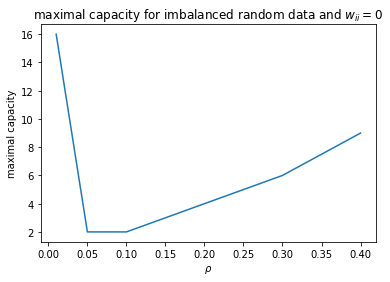

In [113]:
plt.plot(p,max_capacity)
plt.xlabel(r"$\rho$")
plt.ylabel("maximal capacity")
plt.title(r"maximal capacity for imbalanced random data and $w_{ii} = 0$")
plt.show()